<a href="https://colab.research.google.com/github/romitab/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

Data Loading from Local Computer

In [2]:
# Upload file
uploaded = files.upload()

# Get the filename (assumes you're uploading only one file)
filename = list(uploaded.keys())[0]

Saving market_comments.csv to market_comments.csv


Reading the data in pandas dataframe

In [3]:
import pandas as pd

df = pd.read_csv('market_comments.csv')

# Task
Tell me about this dataset.

Here is all the data you need:
"market_comments.csv"

## Data loading

### Subtask:
Load the dataset "market_comments.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "market_comments.csv" into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('market_comments.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'market_comments.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'market_comments.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,item_category,item_id,brand,user_id,date,comment,rating,tonality
0,401,4010201,826,2217,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",2.0,negative
1,403,4030101,1425,1026,2010-07-04,Через 2 месяца после истечении гарантийного ср...,2.0,negative
2,401,4010401,124,2769,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,4.0,positive
3,203,2030301,93,508,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,5.0,positive
4,205,2050201,656,1049,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",5.0,positive


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including shape, data types, missing values, value distributions, and potential relationships between variables.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Identify and count missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Analyze the distribution of values
print("\nSummary statistics for numerical columns:\n", df.describe())
for col in ['item_category', 'item_id', 'brand', 'user_id', 'date', 'comment', 'tonality']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# Explore potential relationships between variables (numerical)
print("\nCorrelation between numerical columns:\n", df.corr())

Shape of the DataFrame: (14281, 8)

Data types of each column:
 item_category      int64
item_id            int64
brand              int64
user_id            int64
date              object
comment           object
rating           float64
tonality          object
dtype: object

Missing values per column:
 item_category    0
item_id          0
brand            0
user_id          0
date             0
comment          0
rating           0
tonality         0
dtype: int64

Summary statistics for numerical columns:
        item_category       item_id         brand       user_id        rating
count   14281.000000  1.428100e+04  14281.000000  14281.000000  14281.000000
mean      341.791401  3.429683e+06    444.264477   1644.381136      4.220664
std       119.358400  1.185182e+06    496.029779    908.351414      1.329364
min       101.000000  1.010102e+06      1.000000      0.000000      1.000000
25%       207.000000  2.070202e+06     48.000000    767.000000      4.000000
50%       405.000000  

ValueError: could not convert string to float: '2013-06-28'

**Reasoning**:
The previous attempt to calculate the correlation matrix failed due to the 'date' column being of object type (string).  I will first convert the 'date' column to datetime objects, then recalculate the correlation.  Additionally, I will examine the unique values in the 'tonality' column to understand its distribution.



In [3]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Recalculate the correlation matrix, excluding non-numerical columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nCorrelation between numerical columns:\n", numerical_cols.corr())

# Examine unique values in 'tonality' column
print(f"\nUnique values in 'tonality' column:\n{df['tonality'].unique()}")
print(f"\nValue counts for 'tonality' column:\n{df['tonality'].value_counts()}")


Correlation between numerical columns:
                item_category   item_id     brand   user_id    rating
item_category       1.000000  0.996368  0.071082 -0.026937 -0.056096
item_id             0.996368  1.000000  0.091706 -0.027120 -0.054684
brand               0.071082  0.091706  1.000000  0.001106 -0.042056
user_id            -0.026937 -0.027120  0.001106  1.000000 -0.002135
rating             -0.056096 -0.054684 -0.042056 -0.002135  1.000000

Unique values in 'tonality' column:
['negative' 'positive']

Value counts for 'tonality' column:
tonality
positive    11952
negative     2329
Name: count, dtype: int64


## Data analysis

### Subtask:
Perform descriptive statistics and analyze categorical variables.


**Reasoning**:
Calculate descriptive statistics for numerical columns and analyze the frequency distribution of categorical variables.



In [4]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
display(numerical_stats)

# Analyze frequency distribution of categorical variables
categorical_cols = ['item_category', 'brand', 'tonality']
for col in categorical_cols:
    frequency = df[col].value_counts()
    display(frequency)

# Investigate potential correlations between numerical and categorical variables
print("\nAverage rating by brand:")
display(df.groupby('brand')['rating'].mean())

print("\nAverage rating by item category:")
display(df.groupby('item_category')['rating'].mean())

,item_category,item_id,brand,user_id,date,rating
count,14281.000000,1.428100e+04,14281.000000,14281.000000,14281,14281.000000
mean,341.791401,3.429683e+06,444.264477,1644.381136,2012-05-22 03:35:10.692528640,4.220664
min,101.000000,1.010102e+06,1.000000,0.000000,2009-07-30 00:00:00,1.000000
25%,207.000000,2.070202e+06,48.000000,767.000000,2010-06-13 00:00:00,4.000000
50%,405.000000,4.050206e+06,93.000000,1538.000000,2011-06-07 00:00:00,5.000000
75%,411.000000,4.110102e+06,787.000000,2549.000000,2014-01-19 00:00:00,5.000000
max,701.000000,7.010101e+06,2159.000000,3231.000000,2017-07-25 00:00:00,5.000000
std,119.358400,1.185182e+06,496.029779,908.351414,NaN,1.329364


,count
item_category,
406,2269
413,1511
203,1018
411,843
107,826
205,802
403,773
401,721
405,602


,count
brand,
11,974
13,925
48,575
879,547
759,541
...,...
1678,1
1600,1
779,1


,count
tonality,
positive,11952
negative,2329



Average rating by brand:


,rating
brand,
1,4.447525
3,4.333333
8,4.500000
10,4.371243
11,4.249692
...,...
1731,4.272727
1876,4.272727
1903,3.666667



Average rating by item category:


,rating
item_category,
101,4.403846
102,4.500000
103,3.861386
104,5.000000
107,4.466102
108,3.813462
109,4.636364
118,4.091603
203,4.504224


## Data visualization

### Subtask:
Visualize the data distributions and relationships identified in the previous analysis steps.


**Reasoning**:
Visualize the data distributions and relationships using histograms, bar charts, and box plots, then save the visualizations.



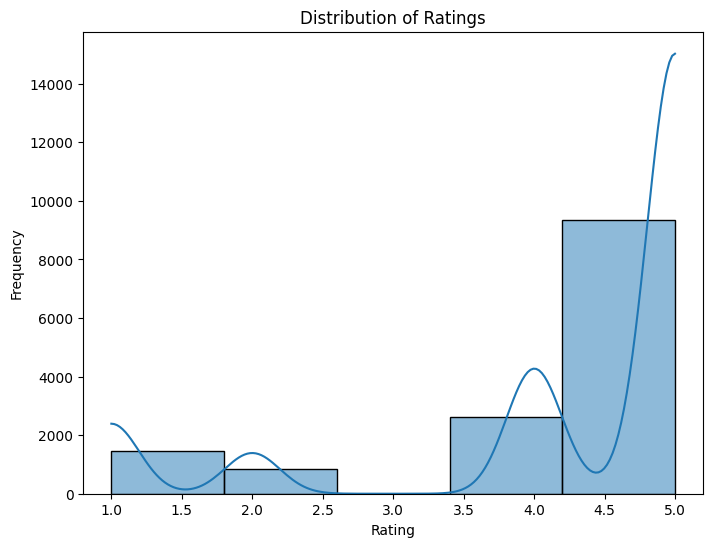

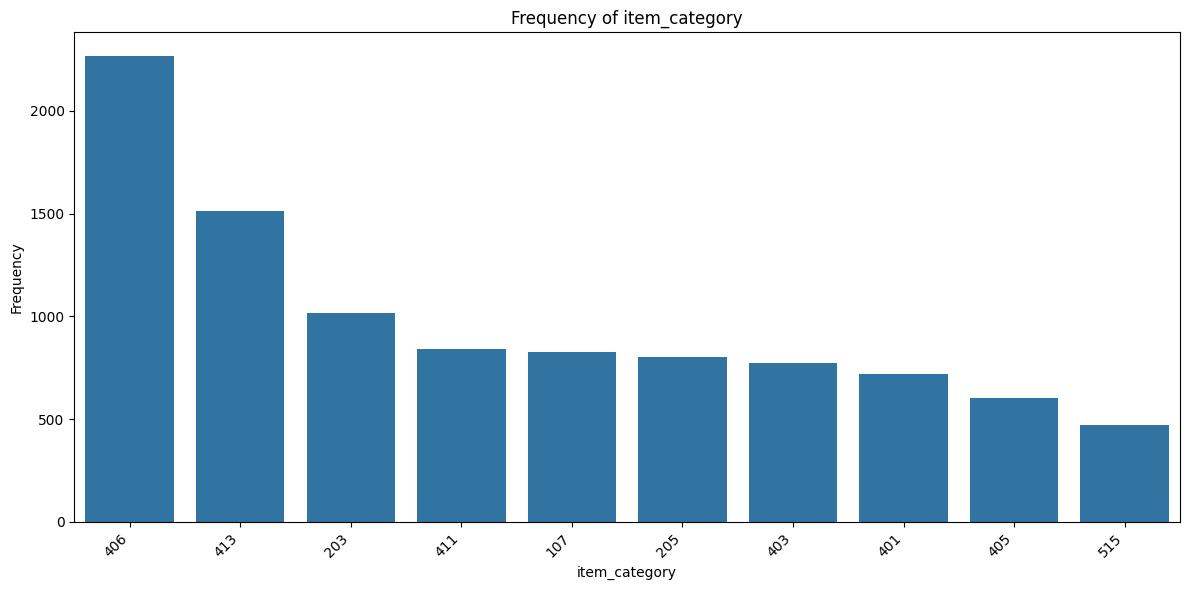

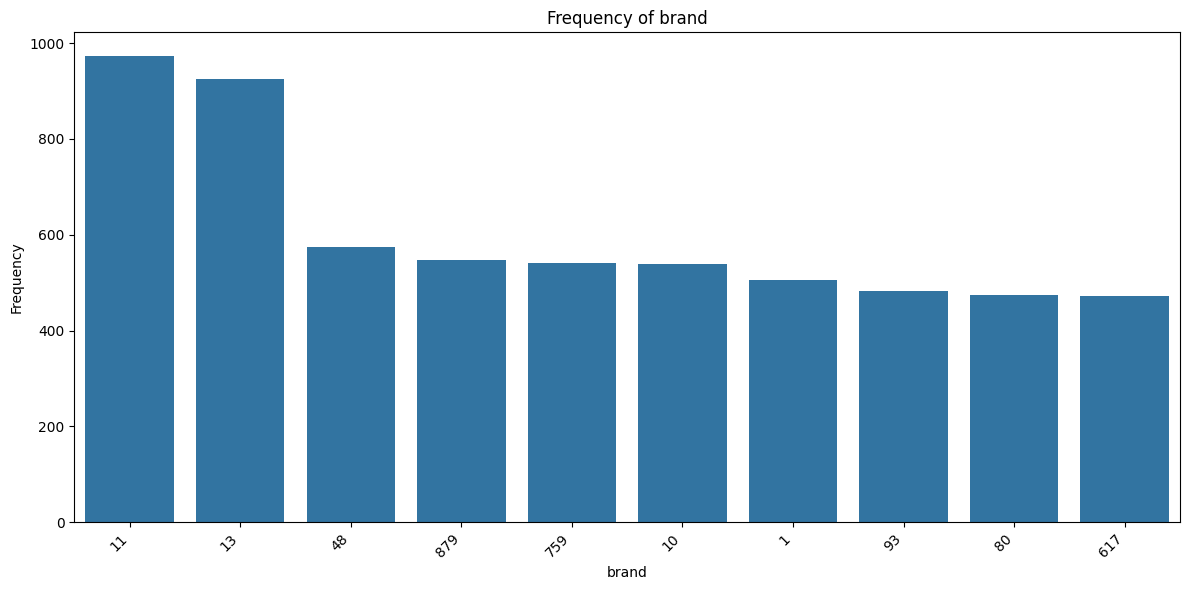

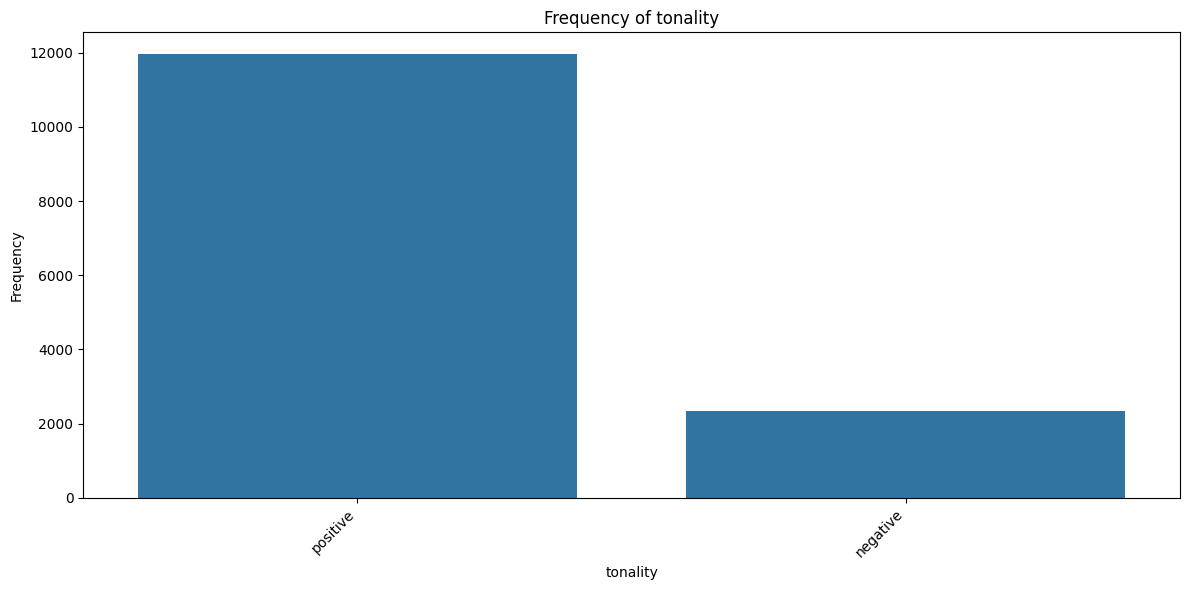

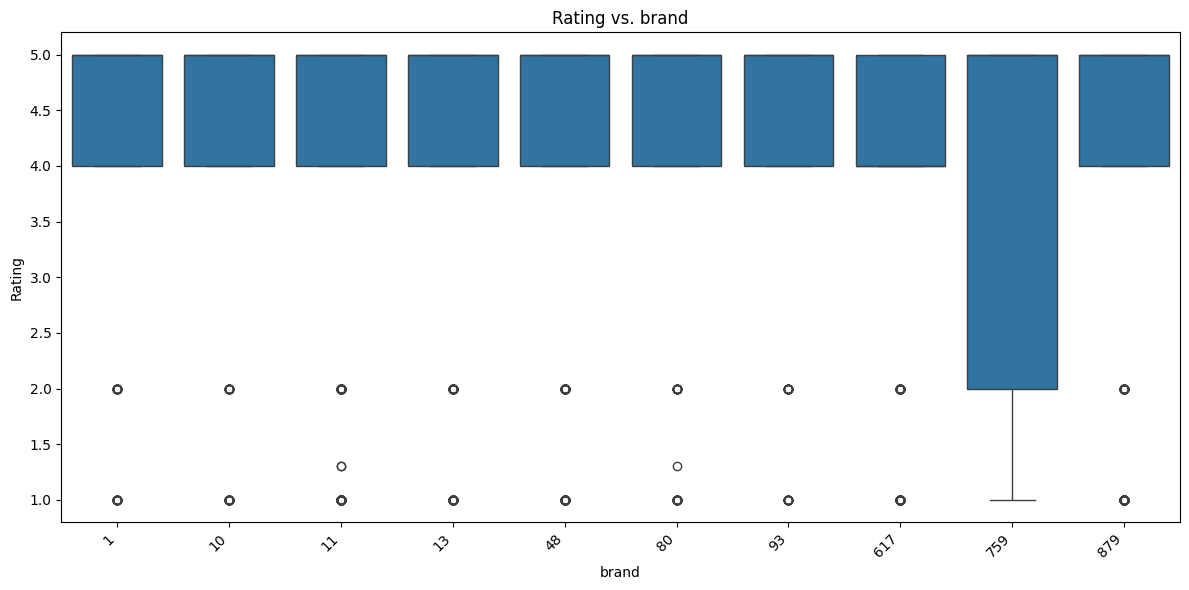

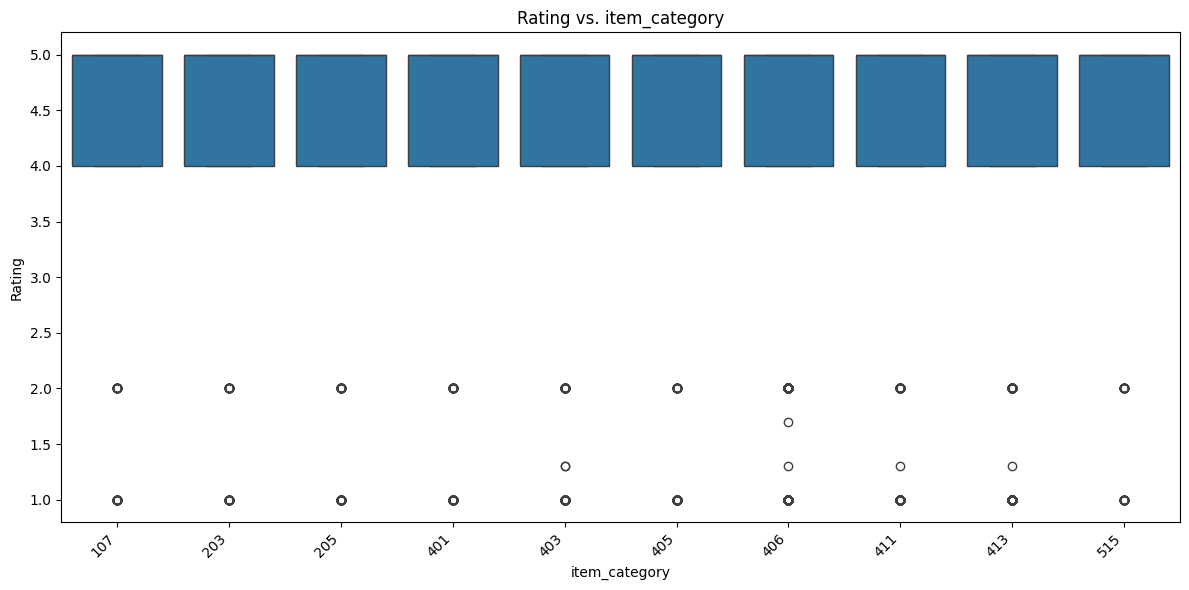

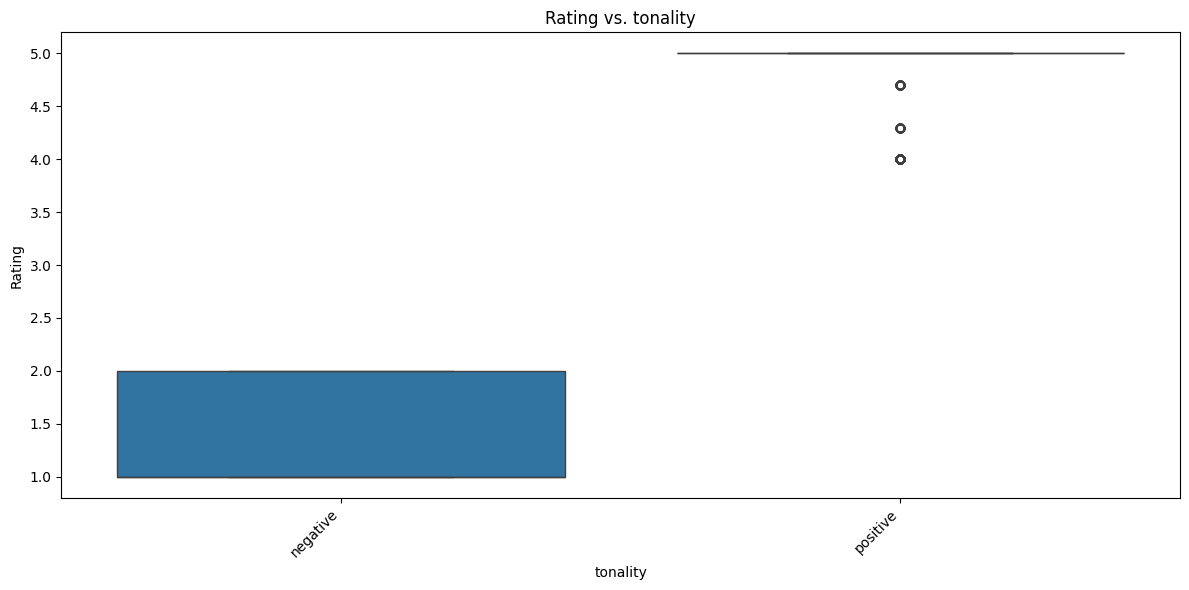

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('rating_distribution.png')
plt.show()

# Bar charts for categorical variables
categorical_cols = ['item_category', 'brand', 'tonality']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    top_10 = df[col].value_counts().nlargest(10)  # Limit to top 10 for better visualization
    sns.countplot(x=col, data=df, order=top_10.index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{col}_frequency.png')
    plt.show()

# Visualize relationship between rating and categorical variables
for col in ['brand', 'item_category', 'tonality']:
    plt.figure(figsize=(12, 6))
    top_10 = df[col].value_counts().nlargest(10).index
    sns.boxplot(x=col, y='rating', data=df[df[col].isin(top_10)])
    plt.title(f'Rating vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'rating_vs_{col}.png')
    plt.show()

## Summary:

### 1. Q&A

No questions were asked in the provided text.


### 2. Data Analysis Key Findings

* **Data Characteristics:** The dataset contains 14,281 rows and 8 columns with no missing values.  `item_category` and `item_id` are highly correlated (0.996).
* **Tonality Distribution:** The majority of comments are positive (11,952 positive vs. 2,329 negative).
* **Rating Distribution:** The average rating is approximately 4.22, with a standard deviation of 1.33, ranging from 1 to 5.
* **Item Category and Brand Influence:**  Average rating varies across different brands and item categories, suggesting potential correlations between these categorical variables and the numerical 'rating' variable.  For instance, some brands have higher average ratings than others.
* **Frequent Categories:** 'item_category' 406 is the most frequent, followed by 413 and 203. Brand 11 is the most common.


### 3. Insights or Next Steps

* **Investigate Correlation:** Further analyze the relationship between `item_category`, `item_id`, and `rating` to understand the driver of the high correlation between item category and ID, and its potential impact on the rating.
* **Deep Dive into Brand and Category Impact:** Conduct more in-depth analysis on how `brand` and `item_category` influence `rating`.  Consider advanced statistical tests or modeling techniques to quantify these relationships more precisely.


In [2]:
!pip install textblob==0.17.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.19.0
    Uninstalling textblob-0.19.0:
      Successfully uninstalled textblob-0.19.0


In [3]:
from textblob import TextBlob
import pandas as pd

 Define Sentiment Classification Function

In [9]:
def classify_sentiment(comment):
  blob = TextBlob(comment)
  sentiment_polarity = blob.sentiment.polarity

  if sentiment_polarity > 0:
    return "Positive"
  elif sentiment_polarity < 0:
    return "Negative"
  else:
    return "Neutral"

 Apply Sentiment Classification to Comments

In [10]:
df['comment_sentiment'] = df['comment'].apply(classify_sentiment)

Analyze the results

In [11]:
sentiment_counts = df['comment_sentiment'].value_counts()
print(sentiment_counts)

comment_sentiment
Neutral     13373
Positive      745
Negative      163
Name: count, dtype: int64


Sentiment Classification using BERT (Binary Classification: Positive vs Negative)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("market_comments.csv")

# Drop missing values
df = df.dropna(subset=['comment', 'tonality'])

# Convert Tonality to binary labels (0 = Negative, 1 = Positive)
df['sentiment_label'] = df['tonality'].apply(lambda x: 1 if x.lower() == 'positive' else 0)

# Split dataset into training and validation sets (80-20 split)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['comment'].tolist(), df['sentiment_label'].tolist(), test_size=0.2, random_state=42
)

Tokenize Text using BERT Tokenizer

In [5]:
from transformers import DistilBertTokenizer

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Convert Data to PyTorch Dataset

In [6]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create PyTorch datasets
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

Load Pre-trained DistilBERT for Binary Classification: We'll fine-tune DistilBERT, a lightweight version of BERT, for our task.

In [7]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT with classification head (2 output classes: Positive & Negative)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define Training Arguments & Train the Model

In [8]:
import os
os.environ["WANDB_DISABLED"] = "true"  # Disable Weights & Biases

from transformers import Trainer, TrainingArguments

# Define training parameters
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True,
    load_best_model_at_end=True
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.451000,0.453779
2,0.419700,0.449379


TrainOutput(global_step=1428, training_loss=0.4416619789700548, metrics={'train_runtime': 323.2301, 'train_samples_per_second': 70.686, 'train_steps_per_second': 4.418, 'total_flos': 3026615124492288.0, 'train_loss': 0.4416619789700548, 'epoch': 2.0})

Including Focal Loss in Training pipeline -we need to pass the custom loss function to the Trainer. Unfortunately, the Trainer API does not directly support custom loss functions out of the box, but we can override the compute_loss method to use Focal Loss.

In [10]:
import os
from transformers import Trainer, TrainingArguments
import torch
import torch.nn as nn
import torch.nn.functional as F

# Disable Weights & Biases (W&B)
#os.environ["WANDB_DISABLED"] = "true"

# Focal Loss Definition
class FocalLoss(nn.Module):
    def __init__(self, alpha=2.0, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)  # Prevents easy samples from dominating
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Define a custom Trainer that uses Focal Loss
class FocalTrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):  # Added num_items_in_batch
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute focal loss
        focal_loss_fn = FocalLoss(alpha=2.0, gamma=2.0)
        loss = focal_loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

# Define training parameters
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True,
    load_best_model_at_end=True,
    report_to="none"
)

# Initialize the custom Trainer with Focal Loss
trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.227200,0.229274
2,0.180700,0.201051
3,0.198800,0.215028


TrainOutput(global_step=2142, training_loss=0.2023877101062504, metrics={'train_runtime': 497.7184, 'train_samples_per_second': 68.858, 'train_steps_per_second': 4.304, 'total_flos': 4539922686738432.0, 'train_loss': 0.2023877101062504, 'epoch': 3.0})

Focal Loss + Class weight Step 1: Modify Focal loss to use class weights

In [22]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        """
        alpha: Class weights (tensor of shape [num_classes]) to handle imbalance.
        gamma: Focusing parameter to down-weight easy examples.
        reduction: 'mean' or 'sum'.
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha  # Class weights (Tensor)
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        inputs: Logits from the model (before softmax), shape [batch_size, num_classes].
        targets: True class labels, shape [batch_size].
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')  # Compute cross-entropy loss
        pt = torch.exp(-ce_loss)  # Probabilities for each sample
        focal_loss = (1 - pt) ** self.gamma * ce_loss  # Apply focal weight

        # Apply class weights if provided
        if self.alpha is not None:
            class_weights = self.alpha.to(inputs.device)  # Ensure weights are on the same device
            focal_loss *= class_weights[targets]

        # Apply reduction strategy
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

Modify FocalTrainer to Use Class Weights.
Now, modify the compute_loss method in FocalTrainer to pass class weights when initializing FocalLoss.

In [23]:
class FocalTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits  # Logits generated here

        # Define class weights and move them to the same device as logits
        class_weights = torch.tensor([3.0, 1.0], device=logits.device)

        # Initialize Focal Loss with class weights
        focal_loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)
        loss = focal_loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

Training Arguments

In [24]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True,
    load_best_model_at_end=True,
    report_to="none",
    lr_scheduler_type="linear"  # Adding linear scheduler
)

Initialize FocalTrainer and Train -
Now, use the modified FocalTrainer to train your model

In [25]:
trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.235700,0.246273
2,0.151300,0.280253


TrainOutput(global_step=2856, training_loss=0.18975198656028391, metrics={'train_runtime': 404.0503, 'train_samples_per_second': 56.547, 'train_steps_per_second': 7.068, 'total_flos': 3026615124492288.0, 'train_loss': 0.18975198656028391, 'epoch': 2.0})

In [7]:
#import torch
#print(torch.cuda.is_available())  # Should print True
#print(torch.cuda.get_device_name(0))  # Should print GPU name (e.g., Tesla T4)

True
Tesla T4


Evaluate Model Performance

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Get predictions
predictions = trainer.predict(val_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()

# Calculate accuracy & classification report
accuracy = accuracy_score(val_labels, preds)
report = classification_report(val_labels, preds, target_names=["Negative", "Positive"])

print(f"Model Accuracy: {accuracy:.4f}")
print(report)

Model Accuracy: 0.8432
              precision    recall  f1-score   support

    Negative       0.56      0.28      0.38       478
    Positive       0.87      0.96      0.91      2379

    accuracy                           0.84      2857
   macro avg       0.72      0.62      0.64      2857
weighted avg       0.82      0.84      0.82      2857

